# 2.4.1 Evaluating hyperparameters - Random forests - Basel weather

### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import Data
#### 3. Load and split data in training/test sets
#### 4. Grid search cv
#### 5. Random search cv
#### 6. Create random forest classifier
#### 7. Conduct feature importances analysis
        
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

---------------------------------------------------------------------------------------------------------------------------
## 2. Import data

In [8]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [10]:
X = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'basel-subset.csv'))
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [12]:
y = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'basel-outcomes-subset.csv'))
y

,BASEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


---------------------------------------------------------------------------------------------------------------------------
## 3. Load and split data in training/test sets

In [15]:
# List of weather stations prefixes;
bas_cols = X.columns

In [17]:
# Create a dictionary to map binary labels to their corresponding categories
bas_labels = ['Not Pleasant','Pleasant']

In [19]:
# Load data, process it, and format it appropriately for training a machine learning model.

In [21]:
# Count classes in y dataset

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [23]:
X.shape

(22950, 9)

In [25]:
y.shape

(22950, 1)

In [27]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [31]:
print(X_train.shape)
X_train

(18360, 9)


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
12262,7,0.72,1.0204,1.41,0.00,0.9,21.2,17.6,25.8
9334,2,0.62,1.0248,3.23,0.00,14.0,18.5,10.7,25.6
7100,5,0.84,1.0180,2.38,1.08,6.0,18.3,12.4,25.9
12030,8,0.93,1.0083,0.18,0.80,0.0,5.0,3.7,5.9
2958,6,0.93,1.0180,0.33,0.22,0.1,1.6,0.7,3.8
...,...,...,...,...,...,...,...,...,...
11964,8,0.90,1.0017,0.59,0.05,0.6,13.3,12.1,16.0
21575,6,0.86,1.0153,1.02,0.08,0.1,1.0,-0.9,3.2
5390,6,0.82,1.0180,0.98,0.00,2.4,6.3,3.5,11.9
860,7,0.70,1.0180,2.26,0.36,5.6,10.1,8.2,15.7


In [33]:
y_train

,BASEL_pleasant_weather
12262,0
9334,1
7100,0
12030,0
2958,0
...,...
11964,0
21575,0
5390,0
860,0


In [35]:
print(y_train.shape)
y_train

(18360, 1)


,BASEL_pleasant_weather
12262,0
9334,1
7100,0
12030,0
2958,0
...,...
11964,0
21575,0
5390,0
860,0


In [37]:
print(X_test.shape)
X_test

(4590, 9)


,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
19955,6,0.68,1.0168,1.14,0.00,4.1,15.1,10.8,19.5
7729,8,0.75,1.0130,0.25,0.78,0.0,1.2,-0.2,2.6
10815,6,0.73,1.0122,1.94,0.00,3.7,20.2,15.8,25.0
3125,4,0.66,1.0180,2.60,0.00,8.1,15.4,6.7,21.9
18985,5,0.80,1.0297,0.23,0.01,0.1,4.3,0.3,9.1
...,...,...,...,...,...,...,...,...,...
15982,8,0.89,1.0085,0.25,0.92,0.0,12.8,9.8,14.9
18660,6,0.75,1.0329,0.78,0.00,3.7,-1.8,-3.6,0.6
705,7,0.70,1.0180,0.43,0.01,1.8,2.8,0.6,8.3
12350,8,0.96,1.0193,0.32,0.17,0.0,4.8,4.3,5.6


In [39]:
print(y_test.shape)
y_test

(4590, 1)


,BASEL_pleasant_weather
19955,1
7729,0
10815,1
3125,1
18985,0
...,...
15982,0
18660,0
705,0
12350,0


---------------------------------------------------------------------------------------------------------------------------
## 4. Grid search cv

In [42]:
# creating a RF classifier
clf = RandomForestClassifier()

In [44]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [46]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.020943792661031 minutes


In [47]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


---------------------------------------------------------------------------------------------------------------------------
## 5. Random search cv

In [49]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [50]:
# Creating a RF classifier
clf2= RandomForestClassifier()

In [51]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.3731178204218546 minutes


In [53]:
# Random random search results# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 1.0


In [54]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 1.0


---------------------------------------------------------------------------------------------------------------------------
## 6. Create random forest classifier

In [60]:
# Creating a RF classifier with the best results from above
#clf = RandomForestClassifier(n_estimators = 100) #original hyperparameters at 100%  

clf3 = RandomForestClassifier(n_estimators = 200, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2)  # Gridsearchcv hyperparameters
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=200)

In [61]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


- **Notes:** relatively high prediction accuracy of 100%.

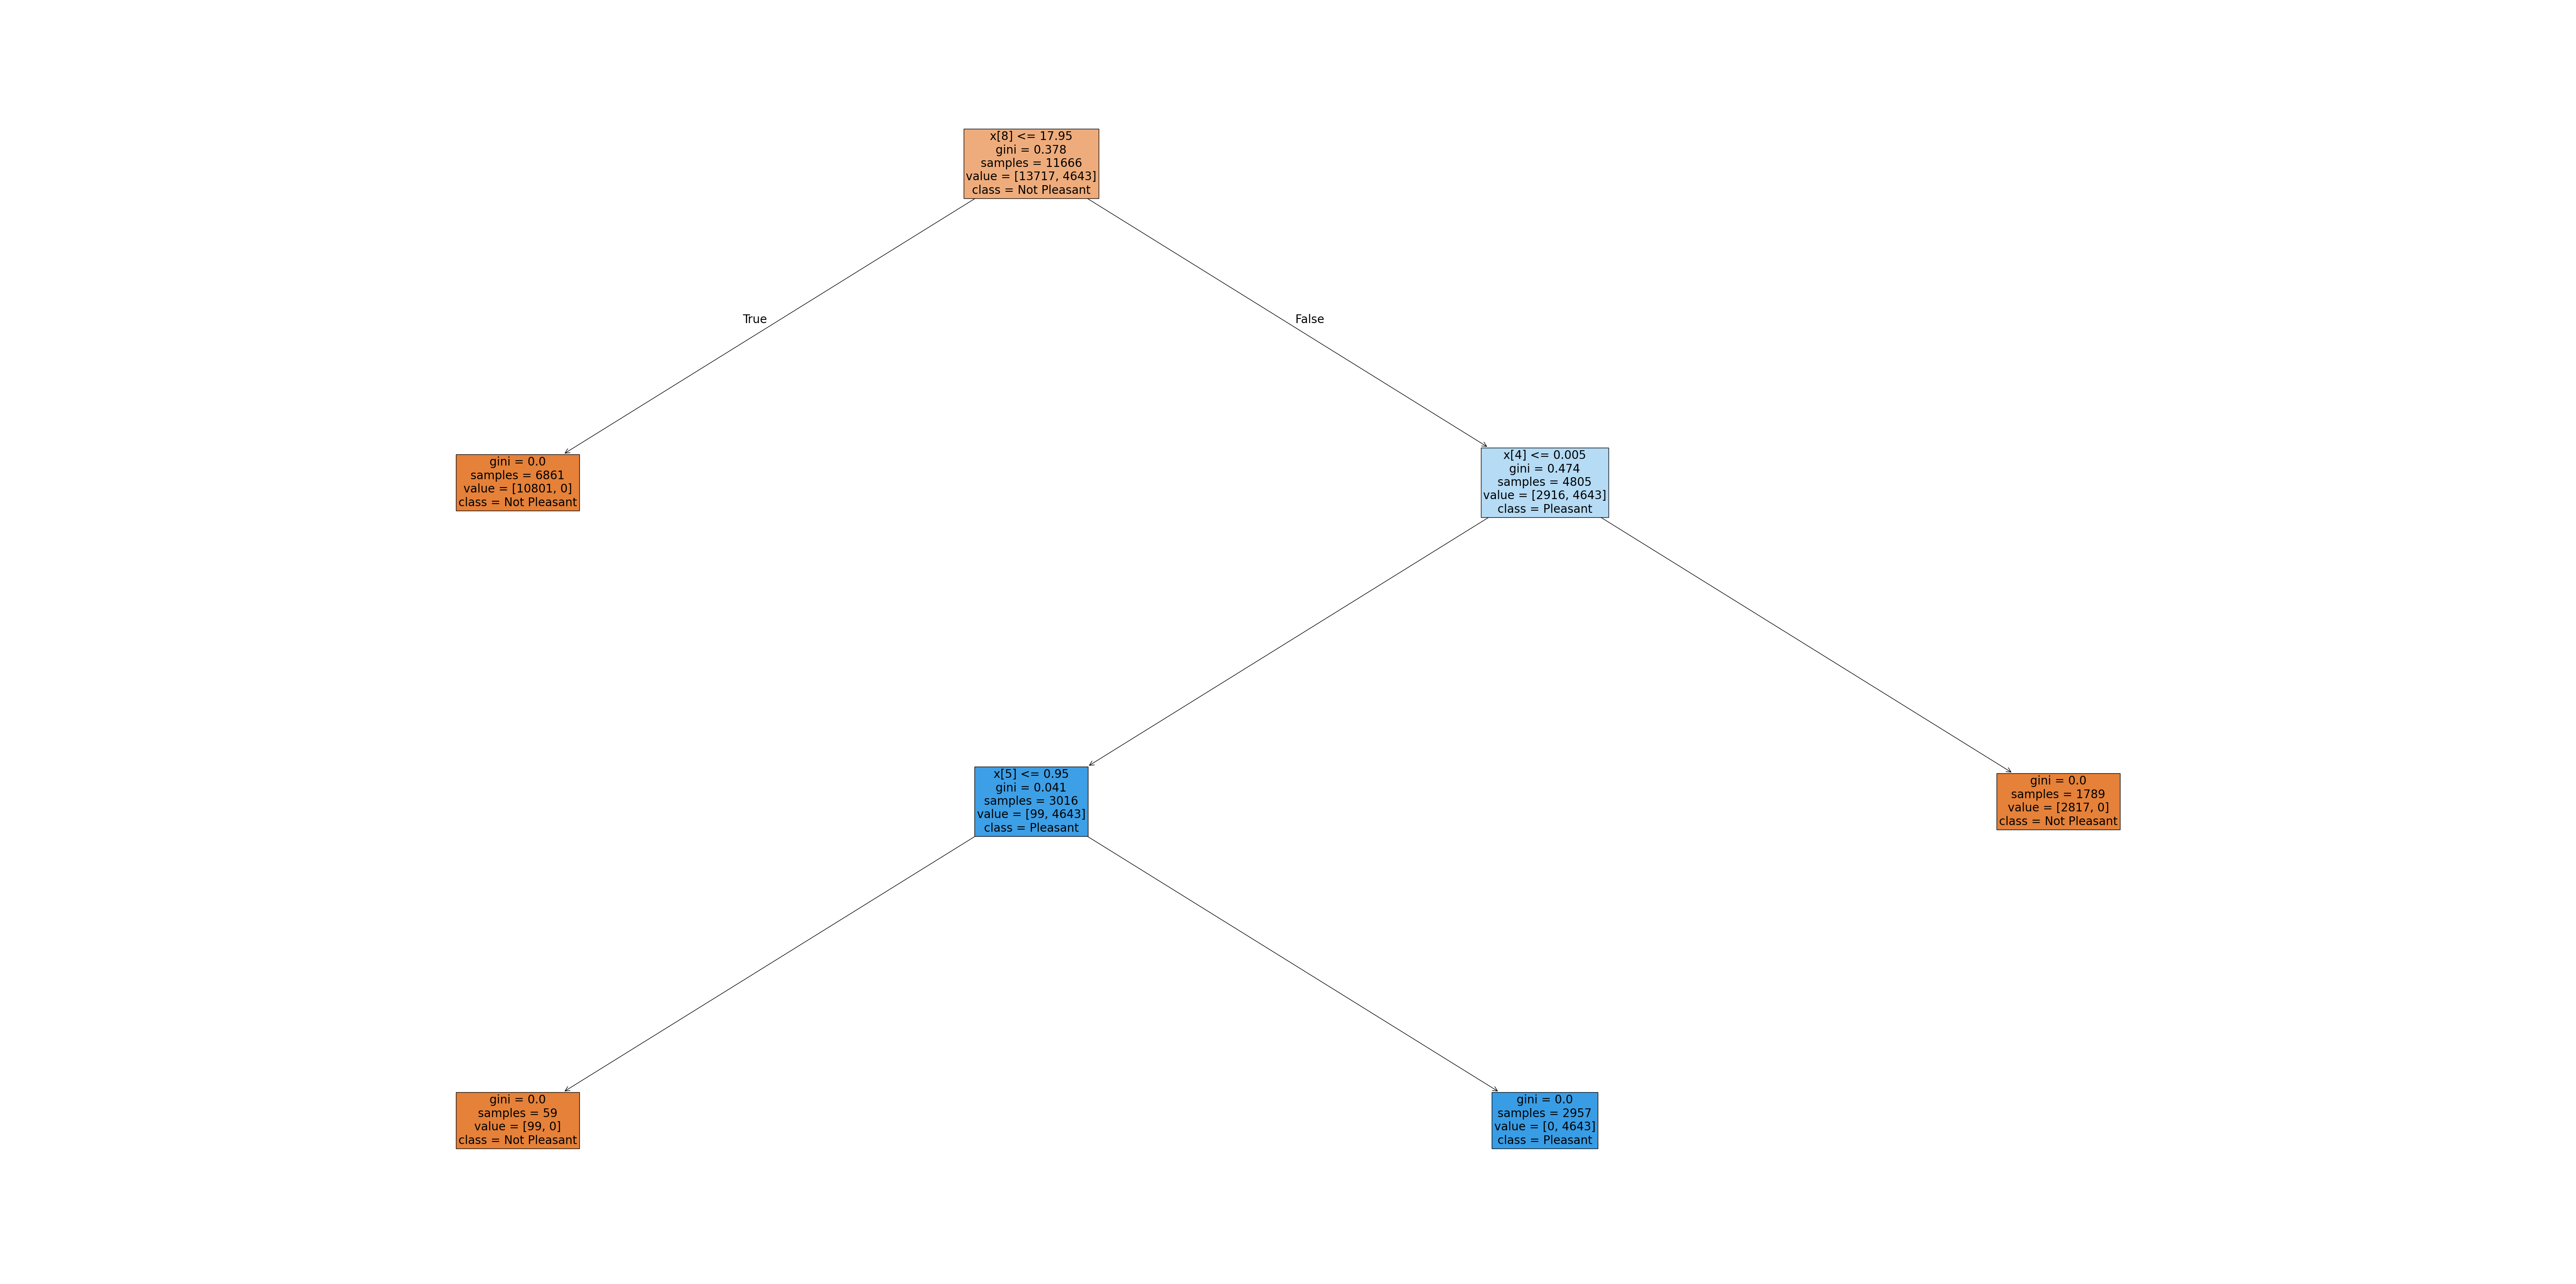

In [63]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=bas_labels, filled=True);

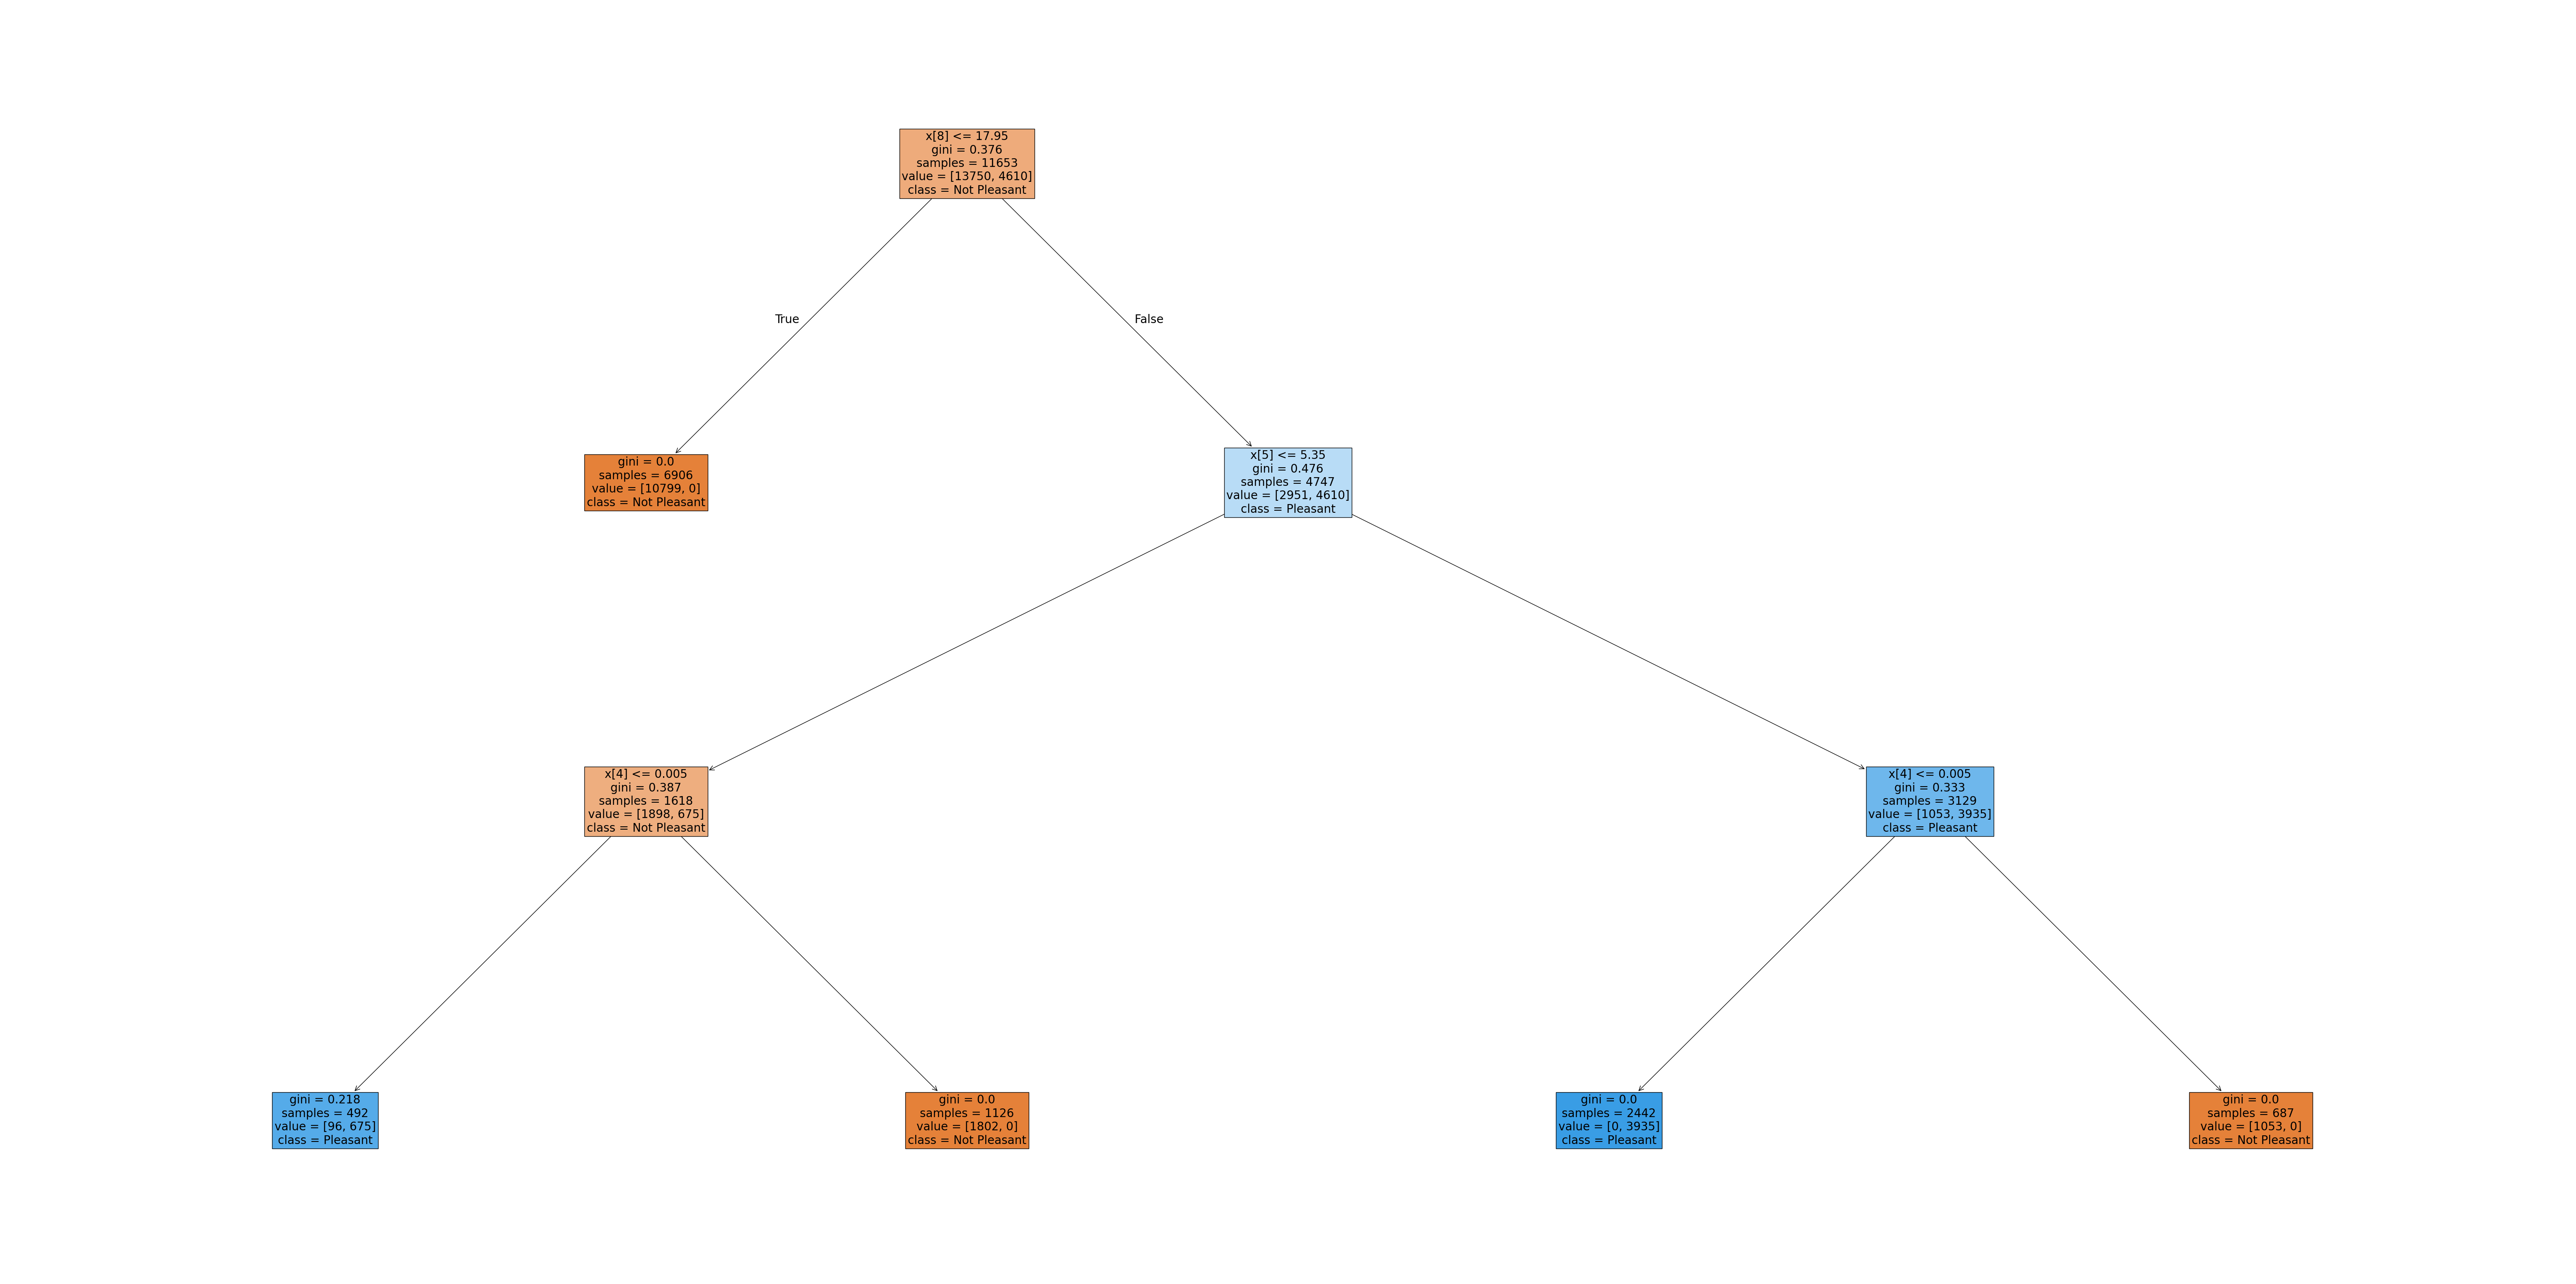

In [64]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[99], fontsize = 20, class_names=bas_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 7. Conduct feature importances analysis

In [66]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([4.88977834e-03, 7.26651364e-07, 1.54946683e-04, 8.35262218e-02,
       4.29202684e-01, 4.78118825e-02, 3.23046249e-03, 3.20527484e-04,
       4.30862770e-01])

In [67]:
#np.set_printoptions(threshold=1000)

In [68]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[4.88977834e-03, 7.26651364e-07, 1.54946683e-04, 8.35262218e-02,
         4.29202684e-01, 4.78118825e-02, 3.23046249e-03, 3.20527484e-04,
         4.30862770e-01]]])

In [69]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([4.88977834e-03, 7.26651364e-07, 1.54946683e-04, 8.35262218e-02,
       4.29202684e-01, 4.78118825e-02, 3.23046249e-03, 3.20527484e-04,
       4.30862770e-01])

In [70]:
important = pd.Series(sumarray, index = bas_cols) #.sort_values(ascending = False)
important

BASEL_cloud_cover         4.889778e-03
BASEL_humidity            7.266514e-07
BASEL_pressure            1.549467e-04
BASEL_global_radiation    8.352622e-02
BASEL_precipitation       4.292027e-01
BASEL_sunshine            4.781188e-02
BASEL_temp_mean           3.230462e-03
BASEL_temp_min            3.205275e-04
BASEL_temp_max            4.308628e-01
dtype: float64

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')


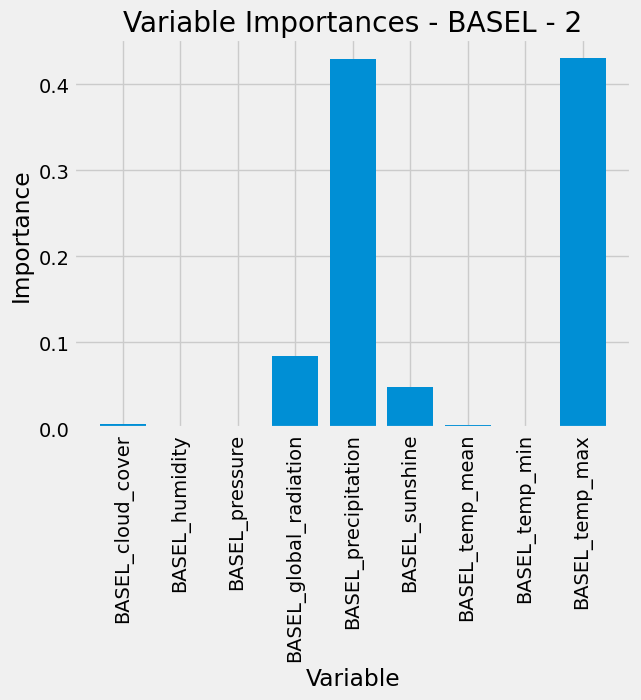

In [71]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(bas_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, bas_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - BASEL - 2');

- **Notes:** As predicted, the top features of importances are for BASEL weather station are:

        1. Precipitation
        2. Temperature max
        3. Global radiation

----------------------------------------------------